In [20]:
import numpy as np

If possible, update your sklearn version to 1.3.2 to reduce variance in the versions.

In [21]:
#!pip3 install scikit-learn==1.3.2

In [22]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.3.2.


# Q3,5,6,7

## Regression - Polynomial features

In [23]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Creating the data matrix + applying standard scaler

In [24]:
from sklearn.preprocessing import StandardScaler
data = california.data
y = california.target
scaler = StandardScaler()
scaler.fit(data)
D = scaler.transform(data)

n,d = D.shape
print(n,d)

20640 8


Creating a design matrix with polynomial features

In [25]:
from sklearn.preprocessing import PolynomialFeatures

aff = PolynomialFeatures(2,include_bias=True)
X = aff.fit_transform(D)
aff.get_feature_names_out(california.feature_names)

array(['1', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude', 'MedInc^2', 'MedInc HouseAge',
       'MedInc AveRooms', 'MedInc AveBedrms', 'MedInc Population',
       'MedInc AveOccup', 'MedInc Latitude', 'MedInc Longitude',
       'HouseAge^2', 'HouseAge AveRooms', 'HouseAge AveBedrms',
       'HouseAge Population', 'HouseAge AveOccup', 'HouseAge Latitude',
       'HouseAge Longitude', 'AveRooms^2', 'AveRooms AveBedrms',
       'AveRooms Population', 'AveRooms AveOccup', 'AveRooms Latitude',
       'AveRooms Longitude', 'AveBedrms^2', 'AveBedrms Population',
       'AveBedrms AveOccup', 'AveBedrms Latitude', 'AveBedrms Longitude',
       'Population^2', 'Population AveOccup', 'Population Latitude',
       'Population Longitude', 'AveOccup^2', 'AveOccup Latitude',
       'AveOccup Longitude', 'Latitude^2', 'Latitude Longitude',
       'Longitude^2'], dtype=object)

## 3
### 3a

In [26]:
feature_names = aff.get_feature_names_out(california.feature_names)

index_of_MedInc = np.where(feature_names == 'MedInc')[0][0]
index_of_MedIncAveBedrms = np.where(feature_names == 'AveBedrms')[0][0]
index_of_HouseAgeAveBedrms = np.where(feature_names == 'HouseAge AveRooms')[0][0]

index_of_MedInc, index_of_MedIncAveBedrms, index_of_HouseAgeAveBedrms
# X.shape

beta = np.linalg.solve(X.T@X,X.T@y)
beta[index_of_MedInc], beta[index_of_MedIncAveBedrms], beta[index_of_HouseAgeAveBedrms]

(0.9224368884326472, 0.5621258213359682, -0.03930124413345543)

### 3b

In [27]:
lambda2 = 0.1
p = X.shape[1]
betaRidge = np.linalg.inv(X.T@X + (lambda2 * n * np.eye(p)))@X.T@y
#betaRidge = np.linalg.solve(X.T@X + (lambda2 * n * np.eye(p), X.T@y))



In [28]:
betaRidge.shape
betaRidge[index_of_MedInc], betaRidge[index_of_MedIncAveBedrms], betaRidge[index_of_HouseAgeAveBedrms]

(0.7195754464200065, 0.008629828670207196, -0.021509396316163776)

## Naive Bayes
From the 20Newsgroups dataset we fetch the documents belonging to three categories, which we use as classes.

In [29]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'talk.politics.guns',
              'sci.space']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

For example, the first document in the training data is the following one:

In [30]:
print(train.data[0])

From: fcrary@ucsu.Colorado.EDU (Frank Crary)
Subject: Re: Riddle me this...
Nntp-Posting-Host: ucsu.colorado.edu
Organization: University of Colorado, Boulder
Distribution: usa
Lines: 16

In article <1r1lp1INN752@mojo.eng.umd.edu> chuck@eng.umd.edu (Chuck Harris - WA3UQV) writes:
>>If so, why was CS often employed against tunnels in Vietnam?

>CS "tear-gas" was used in Vietnam because it makes you wretch so hard that
>your stomach comes out thru your throat.  Well, not quite that bad, but
>you can't really do much to defend yourself while you are blowing cookies.

I think the is BZ gas, not CS or CN. BZ gas exposure results in projectile
vomiting, loss of essentially all muscle control, inability to concentrate
or think rationally and fatal reactions in a significant fraction of
the population. For that reason its use is limited to military
applications.

                                                          Frank Crary
                                                          CU B

The classes are indicated categorically with indices from zero to two by the target vector. The target names tell us which index belongs to which class.

In [31]:
y_train = train.target
y_train

array([2, 2, 1, ..., 1, 2, 2], dtype=int64)

In [32]:
train.target_names

['alt.atheism', 'sci.space', 'talk.politics.guns']

We represent the documents in a bag of word format. That is, we create a data matrix ``D`` such that ``D[j,i]=1`` if the j-th document contains the i-th feature (word), and ``D[j,i]=0`` otherwise. 

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words="english", min_df=5,token_pattern="[^\W\d_]+", binary=True)
D = vectorizer.fit_transform(train.data)
D_test = vectorizer.transform(test.data)
D

<1619x6880 sparse matrix of type '<class 'numpy.int64'>'
	with 174034 stored elements in Compressed Sparse Row format>

We get the allocation of feature indices to words by the following array, containing the vocabulary.

In [34]:
vectorizer.get_feature_names_out()

array(['aa', 'aario', 'aaron', ..., 'zoology', 'zv', 'ÿ'], dtype=object)

For example, the word `naive` has the index 4044.

In [35]:
np.where(vectorizer.get_feature_names_out() == 'naive')[0]

array([4044], dtype=int64)

## 5

### 5a

In [36]:
n = y_train.size

index_with_0 = np.where(y_train == 0)[0]
index_with_1 = np.where(y_train == 1)[0]
index_with_2 = np.where(y_train == 2)[0]


p0 = index_with_0.size / n
p1 = index_with_1.size / n 
p2 = index_with_2.size / n

n, p0, p1, p2

# D[index_with_0,4044].toarray()

(1619, 0.2964793082149475, 0.3662754786905497, 0.3372452130945028)

### 5b

In [37]:
alpha = 10 ** -5
number_of_features = vectorizer.get_feature_names_out().size


number_naive_in_class0 = np.count_nonzero(D[index_with_0,4044].toarray() == [1])
number_naive_in_class1 = np.count_nonzero(D[index_with_1,4044].toarray() == [1])
number_naive_in_class2 = np.count_nonzero(D[index_with_2,4044].toarray() == [1])

print(np.log((number_naive_in_class0 + alpha) / (index_with_0.size + alpha * number_of_features)))
print(np.log((number_naive_in_class1 + alpha) / (index_with_1.size + alpha * number_of_features)))
print(np.log((number_naive_in_class2 + alpha) / (index_with_2.size + alpha * number_of_features)))


# n, D.shape
# number_naive_in_class0, number_naive_in_class1,number_naive_in_class2

-4.564489514531929
-6.385300412553986
-4.916448114015891


### 5c

In [38]:
def probability_x_i_given_class(x_index, class_index_array):
    number_of_features = vectorizer.get_feature_names_out().size
    alpha = 10 ** -5
    number_of_x_d = np.count_nonzero(D[class_index_array,x_index].toarray() == [1])

    return np.log((number_of_x_d + alpha) / (class_index_array.size + alpha * number_of_features))

def probability_x_and_y( prior_probabilities,class_index_array):
    x_0 = D[0,:].toarray()
    result = np.log(prior_probabilities)
    for i in range(x_0.size):
        temp = probability_x_i_given_class(i, class_index_array)
        result += temp
        # if temp < 0:
        #     print(temp, i)
    return result


print(probability_x_and_y(p0,index_with_0))
print(probability_x_and_y(p1,index_with_1))
print(probability_x_and_y(p2,index_with_2))

-57210.94738606317
-51552.20958428612
-49191.18333249681


## Decision Tree

In [39]:
from sklearn.datasets import load_iris
iris = load_iris()
D, y = iris.data, iris.target

In [40]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## 6

### 6a

In [41]:
def Gini_Impurity(y):
    n = len(y)
    class0 = np.count_nonzero(y == 0)
    class1 = np.count_nonzero(y == 1)
    class2 = np.count_nonzero(y == 2)


    print(f"n={n}, #0={class0}, #1={class1}, #2={class2}")

    p0 = class0/n
    p1 = class1/n
    p2 = class2/n
    return 1 - (p0 ** 2 + p1 ** 2 + p2 ** 2)

Gini_Impurity(y)

n=150, #0=50, #1=50, #2=50


0.6666666666666667

### 6b

In [42]:
L0 = []
L1 = []
for i in range(D.shape[0]):
    if (D[i][0] <= 5.84):
        L0.append(y[i])
    else:
        L1.append(y[i])

L0 = np.array(L0)
L1 = np.array(L1)
# L1

Gini_Impurity(L0)
cost = (L0.size/ y.size * Gini_Impurity(L0) + L1.size / y.size * Gini_Impurity(L1)) -Gini_Impurity(y)
cost


n=80, #0=50, #1=24, #2=6
n=80, #0=50, #1=24, #2=6
n=70, #0=0, #1=26, #2=44
n=150, #0=50, #1=50, #2=50


-0.17476190476190478

## SVM

In [43]:
# !pip install Matplotlib


In [44]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split

# added imports
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, KFold

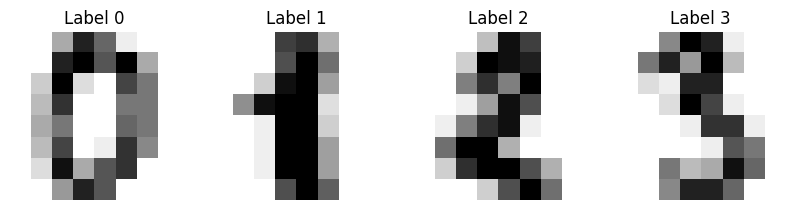

In [45]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Label %i" % label)

In [46]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [47]:
# flatten the images
n = len(digits.images)
D = digits.images.reshape((n, -1))
y = digits.target

# Split data into 70% train and 30% test subsets
D_train, D_test, y_train, y_test = train_test_split(
    D, y, test_size=0.3, shuffle=False
)

## 7
### 7a


In [48]:
model = SVC(gamma=0.0005, C=0.9)
model.fit(D_train, y_train)

prediction_y = model.predict(D_test)

accuracy_score(y_test, prediction_y)


0.9555555555555556

### 7b

In [49]:
# Dual coefficients of the multi-class model
dcoefs = model.dual_coef_

# Number of support vectors for C0 and C1
svCountC0 = model.n_support_[0]
svCountC1 = model.n_support_[1]

svC0 = dcoefs[0, 0:svCountC0]                       #Sv's of C0 used for separating from C1
svC1 = dcoefs[0, svCountC0:svCountC0 + svCountC1]   #Sv's of C1 used for separating from C0

result = np.count_nonzero(svC0) + np.count_nonzero(svC1) 
result

31

### 7d

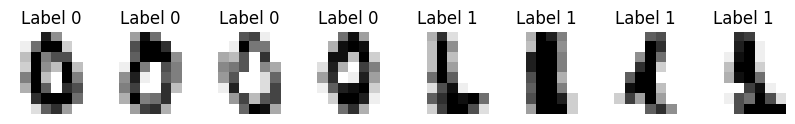

In [50]:
top4C0 = np.argsort(svC0)[-4:]
top4C1 = np.argsort(svC1)[-4:] + svCountC0
topVectors = np.concatenate([top4C0, top4C1])
model.support_vectors_[topVectors].shape

support_indices = model.support_

subset_support_indices = support_indices[topVectors]
subset_support_vectors = model.support_vectors_[topVectors]
subset_support_labels = model.dual_coef_.ravel()[topVectors]


_, axes = plt.subplots(nrows=1, ncols=len(subset_support_indices), figsize=(10, 3))
for ax, index, support_vector, label in zip(axes, subset_support_indices, subset_support_vectors, subset_support_labels):
    ax.set_axis_off()
    ax.imshow(support_vector.reshape(8, 8), cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Label %i" % y_train[index])

plt.show()

### 7e

In [51]:
model = SVC()
param_grid = {
    'C' : [0.6,0.8,1,2,4],
    'kernel' : ['rbf'],
    'gamma' : [0.0001,0.0005,0.001,0.005]
}

kfold = KFold(n_splits=5)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy')
grid_search.fit(D, y)
print("Best parameters found:", grid_search.best_params_)
print("Best accuracy score:", grid_search.best_score_)

Best parameters found: {'C': 4, 'gamma': 0.0005, 'kernel': 'rbf'}
Best accuracy score: 0.9749628597957288
